In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression 

In [60]:
df = pd.read_csv("testset.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1    _conds       100918 non-null  object 
 2    _dewptm      100369 non-null  float64
 3    _fog         100990 non-null  int64  
 4    _hail        100990 non-null  int64  
 5    _heatindexm  29155 non-null   float64
 6    _hum         100233 non-null  float64
 7    _precipm     0 non-null       float64
 8    _pressurem   100758 non-null  float64
 9    _rain        100990 non-null  int64  
 10   _snow        100990 non-null  int64  
 11   _tempm       100317 non-null  float64
 12   _thunder     100990 non-null  int64  
 13   _tornado     100990 non-null  int64  
 14   _vism        96562 non-null   float64
 15   _wdird       86235 non-null   float64
 16   _wdire       86235 non-null   object 
 17   _wgustm      1072 non-null    float64
 18   _wi

In [13]:
df.isna().sum()

datetime_utc         0
 _conds             72
 _dewptm           621
 _fog                0
 _hail               0
 _heatindexm     71835
 _hum              757
 _precipm       100990
 _pressurem        232
 _rain               0
 _snow               0
 _tempm            673
 _thunder            0
 _tornado            0
 _vism            4428
 _wdird          14755
 _wdire          14755
 _wgustm         99918
 _windchillm    100411
 _wspdm           2358
dtype: int64

DATA CLEANING

In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1    _conds       100918 non-null  object 
 2    _dewptm      100369 non-null  float64
 3    _fog         100990 non-null  int64  
 4    _hail        100990 non-null  int64  
 5    _heatindexm  29155 non-null   float64
 6    _hum         100233 non-null  float64
 7    _precipm     0 non-null       float64
 8    _pressurem   100758 non-null  float64
 9    _rain        100990 non-null  int64  
 10   _snow        100990 non-null  int64  
 11   _tempm       100317 non-null  float64
 12   _thunder     100990 non-null  int64  
 13   _tornado     100990 non-null  int64  
 14   _vism        96562 non-null   float64
 15   _wdird       86235 non-null   float64
 16   _wdire       86235 non-null   object 
 17   _wgustm      1072 non-null    float64
 18   _wi

In [19]:
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


FORMATTING DATE

In [61]:
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'], format='%Y%m%d-%H:%M')

df['year'] = df['datetime_utc'].dt.year
df['month'] = df['datetime_utc'].dt.month
df['day'] = df['datetime_utc'].dt.day
df['hour'] = df['datetime_utc'].dt.hour
df.columns = df.columns.str.strip()

Visualizing Time-Based Patterns

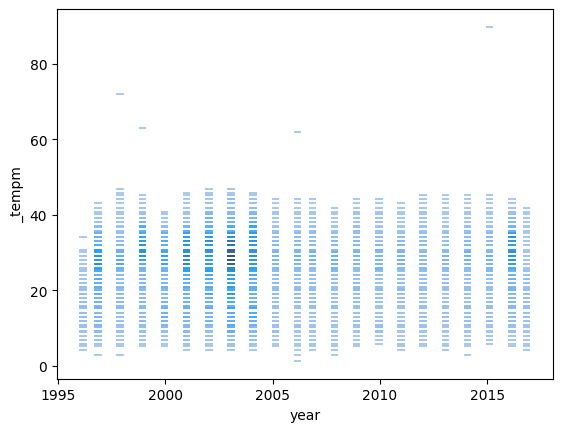

In [42]:
sns.histplot(data=df,x="year",y="_tempm")
plt.show()

In [62]:
df["temp_tomorrow"] = df['_tempm'].shift(-1)
df = df.dropna(subset=['temp_tomorrow'])  # Drop the last row where shift creates NaN
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,...,_wdird,_wdire,_wgustm,_windchillm,_wspdm,year,month,day,hour,temp_tomorrow
0,1996-11-01 11:00:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,...,280.0,West,NaN,NaN,7.4,1996,11,1,11,28.0
1,1996-11-01 12:00:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,...,0.0,North,NaN,NaN,NaN,1996,11,1,12,24.0
2,1996-11-01 13:00:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,...,0.0,North,NaN,NaN,NaN,1996,11,1,13,24.0
3,1996-11-01 14:00:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,...,0.0,North,NaN,NaN,NaN,1996,11,1,14,23.0
4,1996-11-01 16:00:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,...,0.0,North,NaN,NaN,0.0,1996,11,1,16,21.0


In [63]:
df_noon = df[df['hour'] == 12].copy()
df_noon.sort_values(by='datetime_utc', inplace=True)
df_noon['temp_tomorrow'] = df_noon['_tempm'].shift(-1)

df_noon.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,...,_wdird,_wdire,_wgustm,_windchillm,_wspdm,year,month,day,hour,temp_tomorrow
1,1996-11-01 12:00:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,...,0.0,North,NaN,NaN,NaN,1996,11,1,12,27.0
24,1996-11-02 12:00:00,Smoke,10.0,0,0,NaN,34.0,NaN,1009.0,0,...,20.0,NNE,NaN,NaN,7.4,1996,11,2,12,26.0
48,1996-11-03 12:00:00,Smoke,12.0,0,0,NaN,42.0,NaN,1010.0,0,...,0.0,North,NaN,NaN,0.0,1996,11,3,12,25.0
71,1996-11-04 12:00:00,Smoke,10.0,0,0,NaN,39.0,NaN,1010.0,0,...,0.0,North,NaN,NaN,0.0,1996,11,4,12,25.0
88,1996-11-06 12:00:00,Smoke,7.0,0,0,NaN,32.0,NaN,1011.0,0,...,0.0,North,NaN,NaN,NaN,1996,11,6,12,25.0


In [64]:
numeric_df = df_noon[["_dewptm","_hum","_pressurem","_tempm","_vism","_wdird","_wspdm"]]
numeric_df

,_dewptm,_hum,_pressurem,_tempm,_vism,_wdird,_wspdm
1,10.0,32.0,-9999.0,28.0,NaN,0.0,NaN
24,10.0,34.0,1009.0,27.0,3.5,20.0,7.4
48,12.0,42.0,1010.0,26.0,3.0,0.0,0.0
71,10.0,39.0,1010.0,25.0,2.0,0.0,0.0
88,7.0,32.0,1011.0,25.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...
100961,22.0,28.0,996.0,39.0,2.0,70.0,5.6
100970,18.0,30.0,1000.0,34.0,1.0,0.0,18.5
100971,18.0,41.0,1001.0,33.0,2.0,90.0,11.1
100979,12.0,12.0,999.0,39.0,4.0,270.0,9.3


Text(0.5, 1.0, 'analyzing the dependency between variable')

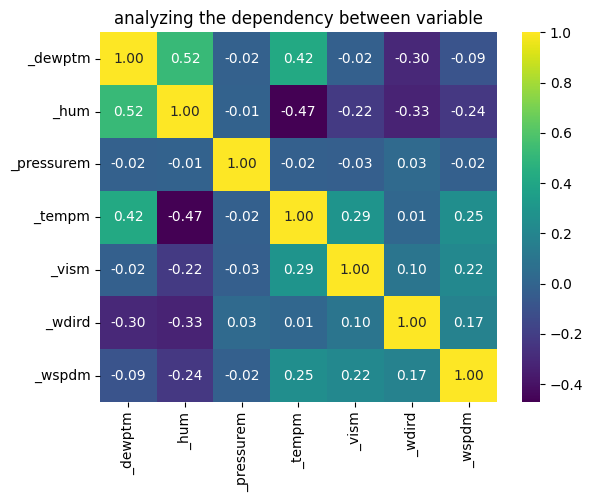

In [65]:
sns.heatmap(numeric_df.corr(),annot=True,cmap="viridis",fmt=".2f")
plt.title("analyzing the dependency between variable")

In [79]:
x = numeric_df #independent variables
y = temp_tomorrow #dependent variable
df2 = pd.DataFrame(x)
df2["tomarrow"] = y;

x = df2[["_dewptm","_hum","_pressurem","_tempm","_vism","_wdird","_wspdm"]]
y = df2["tomarrow"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42,shuffle=False)


In [80]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [88]:
y_pred = model.predict(x_test)

In [89]:
print("mean squared error: ",mean_squared_error(y_test,y_pred))
print("R squared error: ",r2_score(y_test,y_pred))

mean squared error:  6.002238660698362
R squared error:  0.8924871030948949


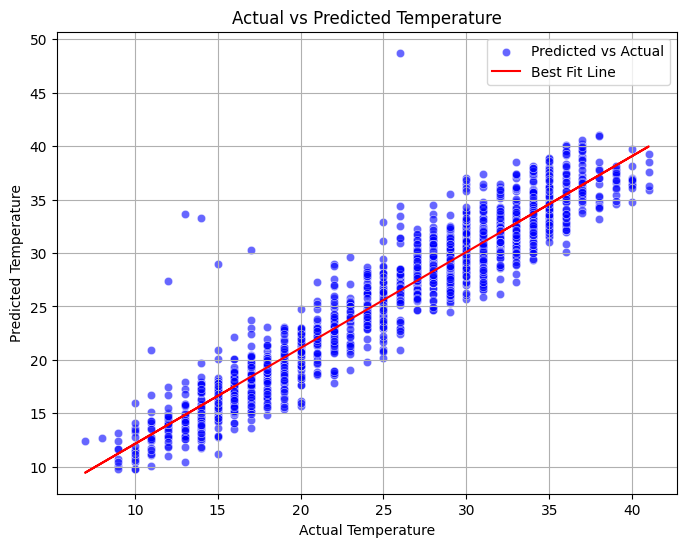

In [92]:
import numpy as np
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue', label='Predicted vs Actual')

# Best fit line (from numpy)
slope, intercept = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, slope * y_test + intercept, color='red', label='Best Fit Line')

plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Temperature")
plt.legend()
plt.grid(True)
plt.show()

In [93]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Training Scores
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)

# Testing Scores
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Train R²:", train_r2)
print("Test R²:", test_r2)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Train R²: 0.946619445543899
Test R²: 0.8924871030948949
Train MSE: 3.4002538247885954
Test MSE: 6.002238660698362


In [98]:
import numpy as np

yy = model.predict(np.array([[15.6, 41, 1009, 31, 3, 139, 17]]))  # 2D array, shape (1, 6)
print(yy)


[28.775165]


C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
